In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
sys.path.append('../.')

# Import only what's actually needed to avoid the dask import issue
from GrindingData import GrindingData
from MyDataset import project_dir
from MyCustomModels import MyCustomGrindingPredictor as GrindingPredictor
from GrindingData import GrindingData
from MyDataset import project_dir, allowed_input_types
from plot_time_series_simple import load_physics_data, find_bdi_indices, load_trained_model, generate_predictions_for_model, plot_time_series_base, plot_time_series_simple


# # Define the functions that were imported from plot_prediction_simple
def load_physics_data():
    """
    Load physics data including surface roughness and BDI values.
    """
    # Create GrindingData instance
    grinding_data = GrindingData(project_dir)
    
    # Load only physics data (much more efficient)
    print("Loading physics data...")
    grinding_data._load_all_physics_data()
    
    # Extract the data we need
    true_values = grinding_data.sr * 1e3  # Convert to μm
    bdi_values = grinding_data.bid
    st_values = grinding_data.st
    
    # Convert to numpy arrays and ensure proper shape
    true_values = np.array(true_values).flatten()
    bdi_values = np.array(bdi_values).flatten()
    st_values = np.array(st_values).flatten()
    
    print(f"Loaded physics data for {len(true_values)} samples")
    print(f"BDI range: {np.min(bdi_values):.3f} to {np.max(bdi_values):.3f}")
    print(f"Surface roughness range: {np.min(true_values):.3f} to {np.max(true_values):.3f} μm")
    
    return true_values, bdi_values, st_values

def find_bdi_indices(bdi_values, threshold=1.0):
    """
    Find indices where BDI transitions between brittle and ductile regimes.
    """
    bdi_regime = bdi_values > threshold
    regime_changes = np.where(np.diff(bdi_regime.astype(int)) != 0)[0] + 1
    regime_starts = np.concatenate(([0], regime_changes))
    regime_ends = np.concatenate((regime_changes, [len(bdi_regime)]))
    return regime_starts, regime_ends, bdi_regime

# Placeholder functions for the missing imports
def load_trained_model(model_path):
    """Placeholder for loading trained model"""
    print(f"Would load model from: {model_path}")
    return None

def generate_predictions_for_model(model, data):
    """Placeholder for generating predictions"""
    print("Would generate predictions")
    return None

def plot_time_series_base(true_values, predictions, bdi_values, title="Prediction vs Ground Truth"):
    """
    Create a simple time series plot with BDI regime coloring.
    """
    sample_indices = np.arange(len(true_values))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot ground truth and predictions
    ax.plot(sample_indices, true_values, 'o-', label='Ground Truth', 
            color='black', alpha=0.8, markersize=4, linewidth=1.5)
    
    if predictions is not None:
        ax.plot(sample_indices, predictions, 's-', label='Prediction', 
                color='red', alpha=0.8, markersize=4, linewidth=1.5)
    
    # Color background based on BDI regime
    regime_starts, regime_ends, bdi_regime = find_bdi_indices(bdi_values)
    
    for start, end in zip(regime_starts, regime_ends):
        regime = bdi_regime[start]
        color = 'lightblue' if regime else 'lightcoral'
        alpha = 0.3 if regime else 0.2
        
        # Use integer indices for sample positions
        x_start = sample_indices[max(0, start)]
        x_end = sample_indices[min(len(sample_indices)-1, end)]
        
        ax.axvspan(x_start, x_end, ymin=0, ymax=1, alpha=alpha, color=color)
    
    # Customize plot
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Surface Roughness Ra (um)')
    ax.set_title(title)
    
    # Create legend with regime information
    legend_elements = [
        Line2D([0], [0], color='black', marker='o', linestyle='-', label='Ground Truth'),
        Patch(facecolor='lightblue', alpha=0.3, label='BDI > 1 (Ductile)'),
        Patch(facecolor='lightcoral', alpha=0.2, label='BDI < 1 (Brittle)')
    ]
    
    if predictions is not None:
        legend_elements.insert(1, Line2D([0], [0], color='red', marker='s', linestyle='-', label='Prediction'))
    
    ax.legend(handles=legend_elements, loc='upper right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

Loading physics data...
Loaded physics data for 320 samples
BDI range: 0.667 to 1.667
Surface roughness range: 66.000 to 380.600 μm
Successfully loaded physics data!


/tmp/ipykernel_328202/303436526.py:119: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


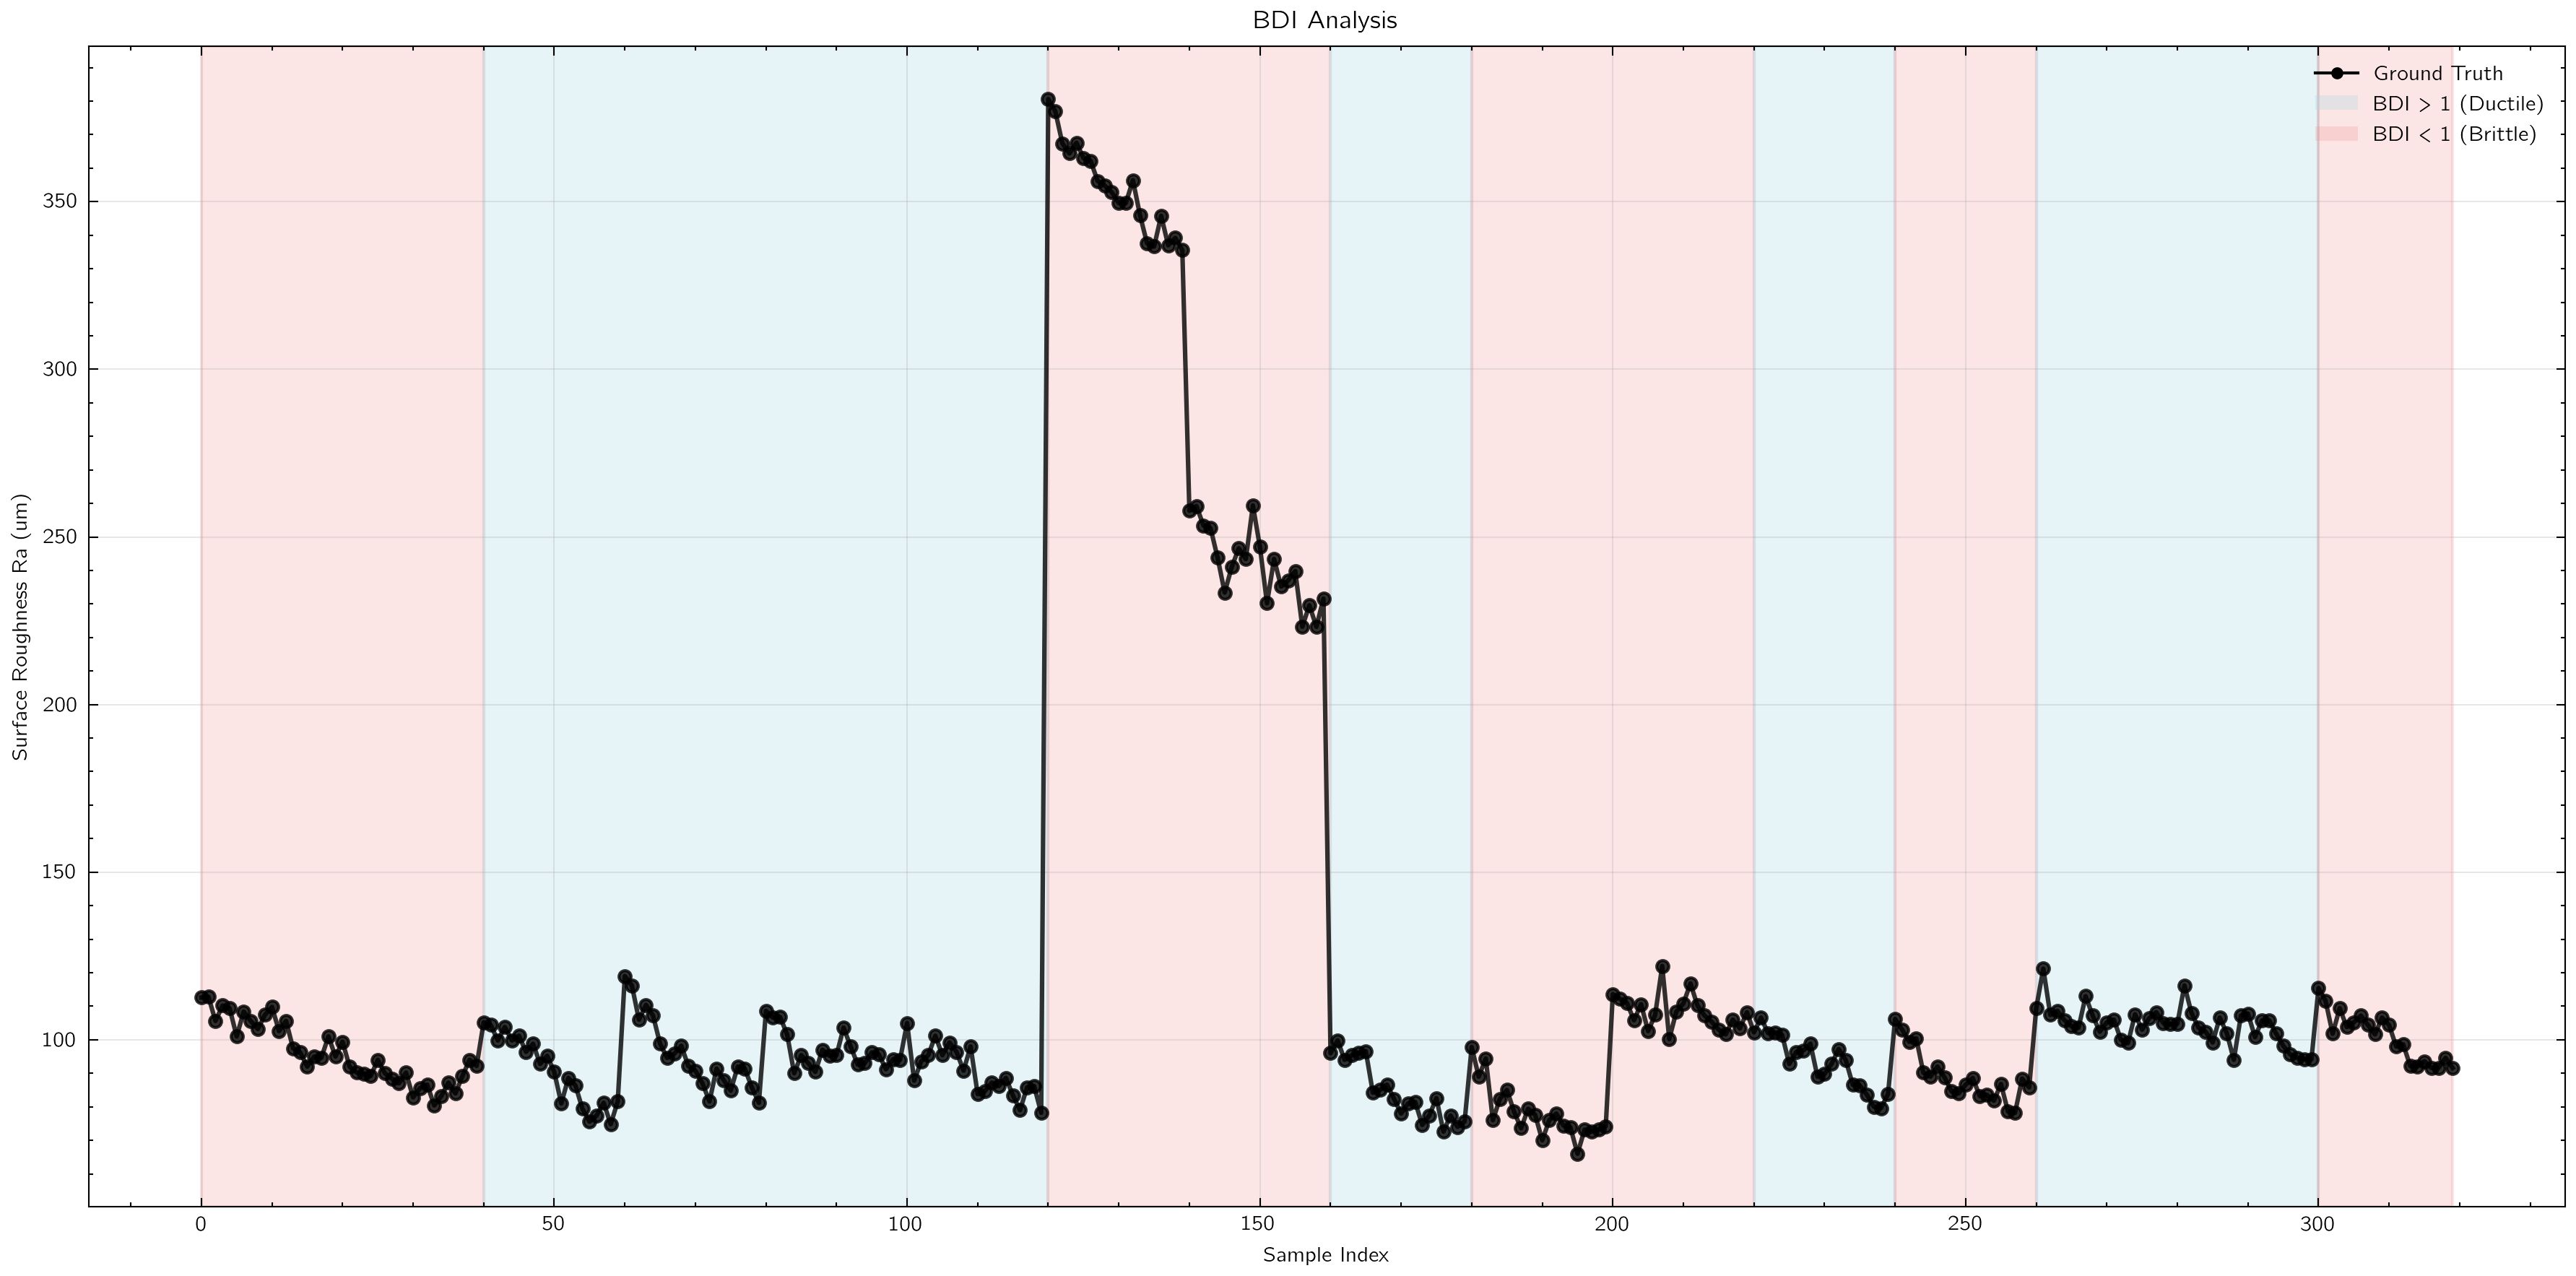

In [5]:
# Test the fixed imports
try:
    true_values, bdi_values, st_values = load_physics_data()
    print("Successfully loaded physics data!")
    
    # Create a simple plot
    fig, ax = plot_time_series_base(true_values, None, bdi_values, "BDI Analysis")
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()